COMPREHENSIVE BALANCE PREDICTION ANALYSIS

ANALYZING CURRENT MODEL (FIRST 29 DAYS)
Reading date_over_balance_test.xlsx...
Data shape: (30, 3)
Columns: ['Date', 'Balance', 'Predicted_Balance_Denormalized']

First few rows:
         Date    Balance  Predicted_Balance_Denormalized
0  2024-12-04  100898.04                       139353.10
1  2024-12-05  100898.04                       141228.59
2  2024-12-06   75893.04                       141373.69
3  2024-12-07   75893.04                       138681.64
4  2024-12-08   75893.04                       116728.88

Using columns:
Date: Date
Actual: Balance
Predicted: Predicted_Balance_Denormalized

Limited to first 29 days
New data shape: (29, 3)

Calculating error metrics...

Current Model (First 29 Days) - ERROR METRICS
Number of data points: 29

ERROR METRICS:
Mean Square Error (MSE): 994,283,715.2349
Root Mean Square Error (RMSE): 31,532.2647
Mean Absolute Error (MAE): 23,657.0159
Mean Absolute Percentage Error (MAPE): 205.65%
Symmetric M

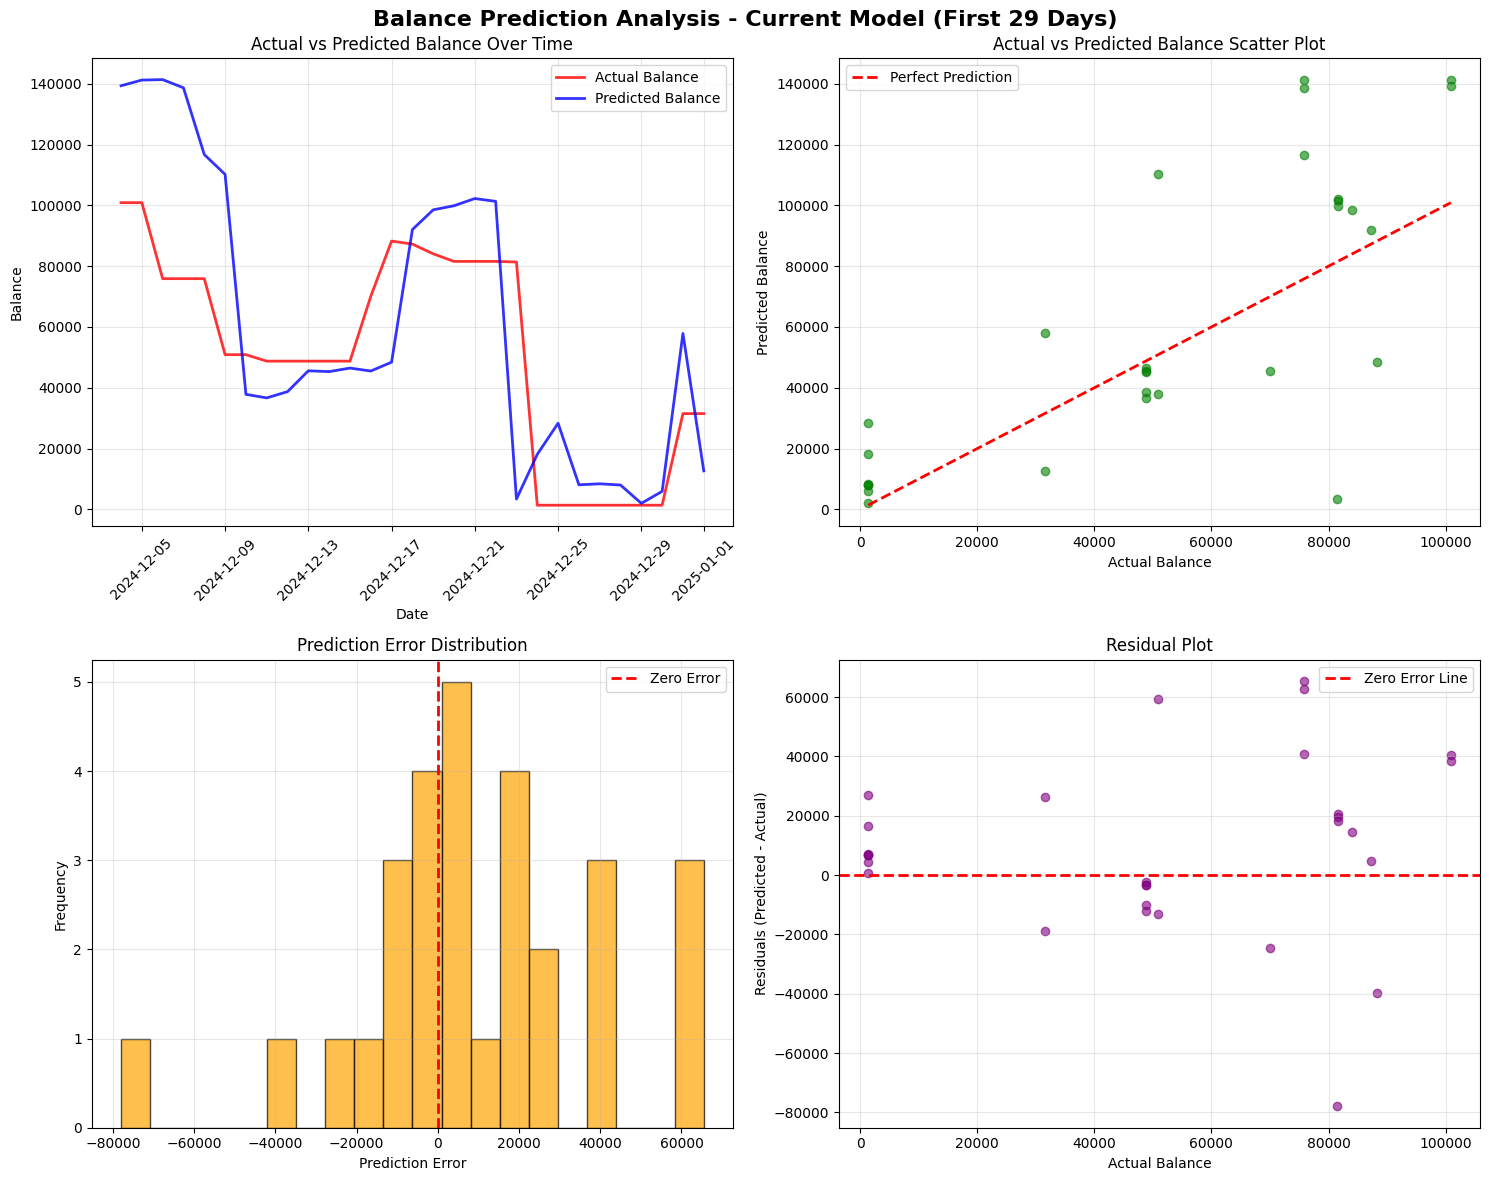


ANALYZING CURRENT MODEL (ALL 30 DAYS)
Reading date_over_balance_test.xlsx...
Data shape: (30, 3)
Columns: ['Date', 'Balance', 'Predicted_Balance_Denormalized']

First few rows:
         Date    Balance  Predicted_Balance_Denormalized
0  2024-12-04  100898.04                       139353.10
1  2024-12-05  100898.04                       141228.59
2  2024-12-06   75893.04                       141373.69
3  2024-12-07   75893.04                       138681.64
4  2024-12-08   75893.04                       116728.88

Using columns:
Date: Date
Actual: Balance
Predicted: Predicted_Balance_Denormalized

Calculating error metrics...

Current Model (All 30 Days) - ERROR METRICS
Number of data points: 30

ERROR METRICS:
Mean Square Error (MSE): 3,776,114,543.1981
Root Mean Square Error (RMSE): 61,450.0980
Mean Absolute Error (MAE): 32,555.1640
Mean Absolute Percentage Error (MAPE): 230.34%
Symmetric Mean Absolute Percentage Error (SMAPE): 67.36%

CORRELATION METRICS:
Correlation coefficient: 0

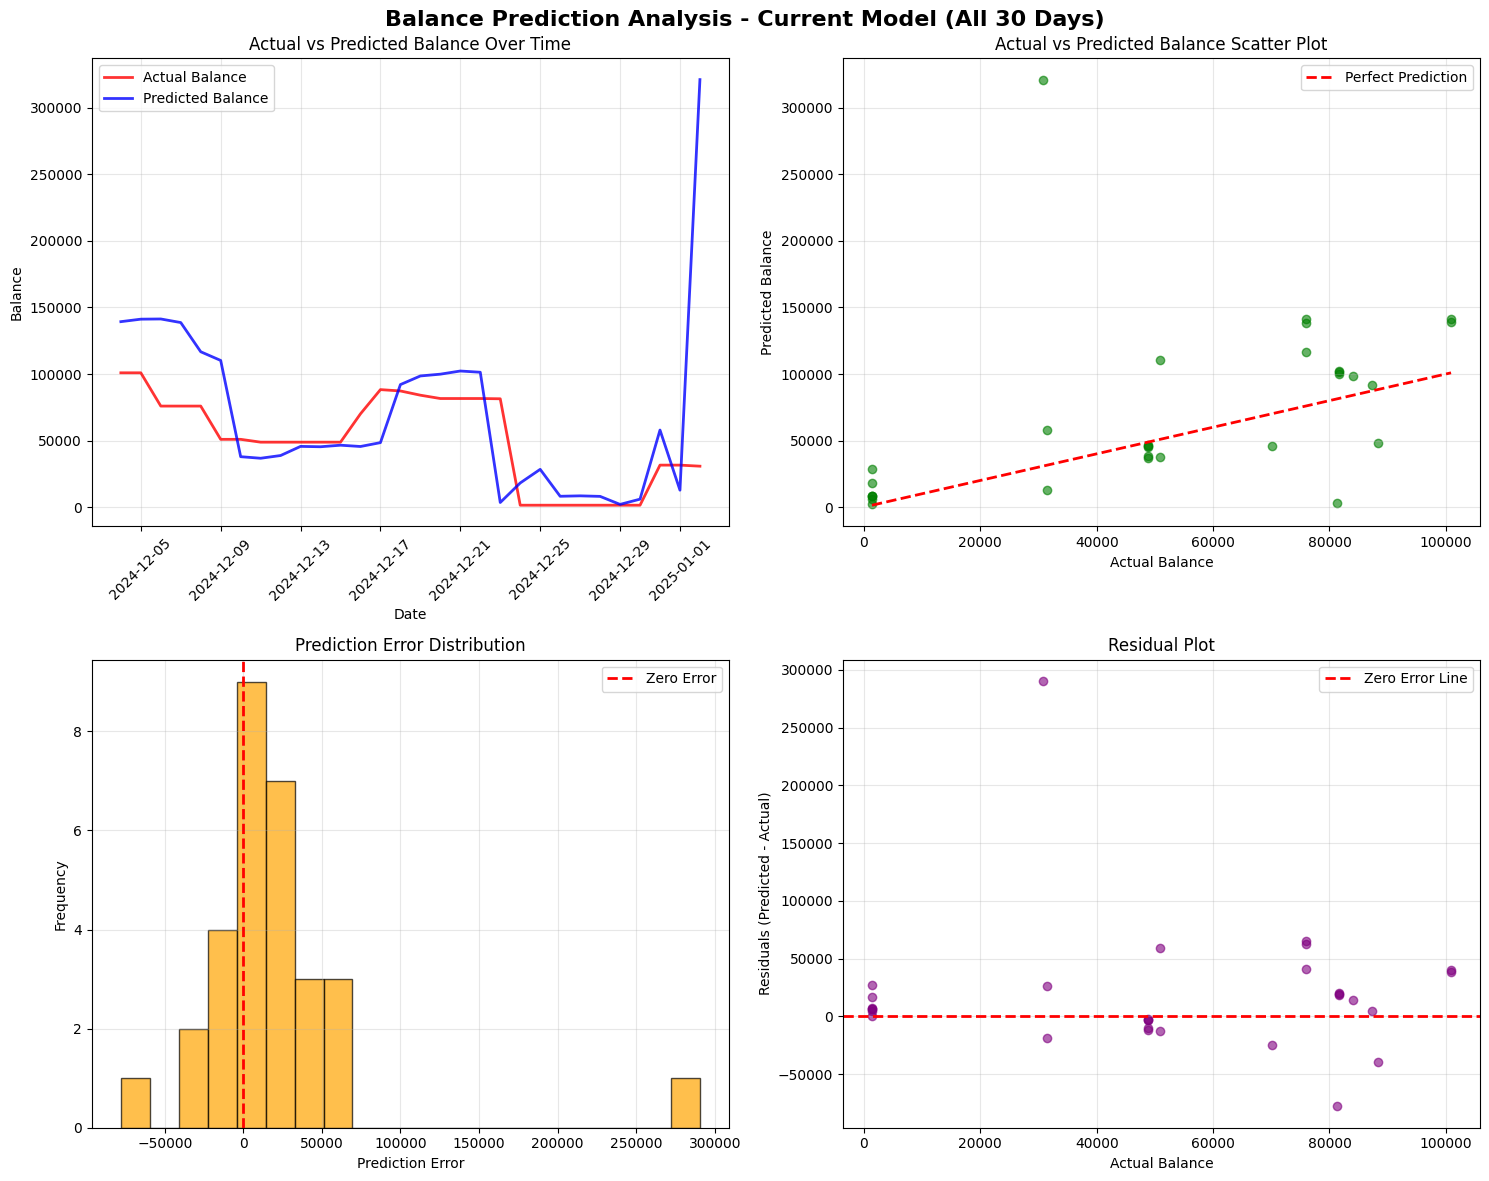


ANALYZING 37-DAY MODEL RESULTS
Reading 37_days/forecast_final_with_actual.xlsx...
Data shape: (30, 7)
Columns: ['Time', 'Forecast_Balance', 'Denormalized_Actual', 'Day_Number', 'Daily_Change_Actual', 'Cumulative_Change_Actual', 'Unnamed: 6']

First few rows:
        Time  Forecast_Balance  Denormalized_Actual  Day_Number  \
0 2024-11-21          0.380870         64173.957031           1   
1 2024-11-22          0.281527         47457.542969           2   
2 2024-11-23          0.273502         46107.171875           3   
3 2024-11-24          0.281802         47503.851562           4   
4 2024-11-25          0.347147         58499.421875           5   

   Daily_Change_Actual  Cumulative_Change_Actual  Unnamed: 6  
0                  NaN                  0.000000    57607.85  
1        -16716.414062             -16716.414062    57607.85  
2         -1350.371094             -18066.785156    57607.85  
3          1396.679688             -16670.105469    57607.85  
4         10995.570312

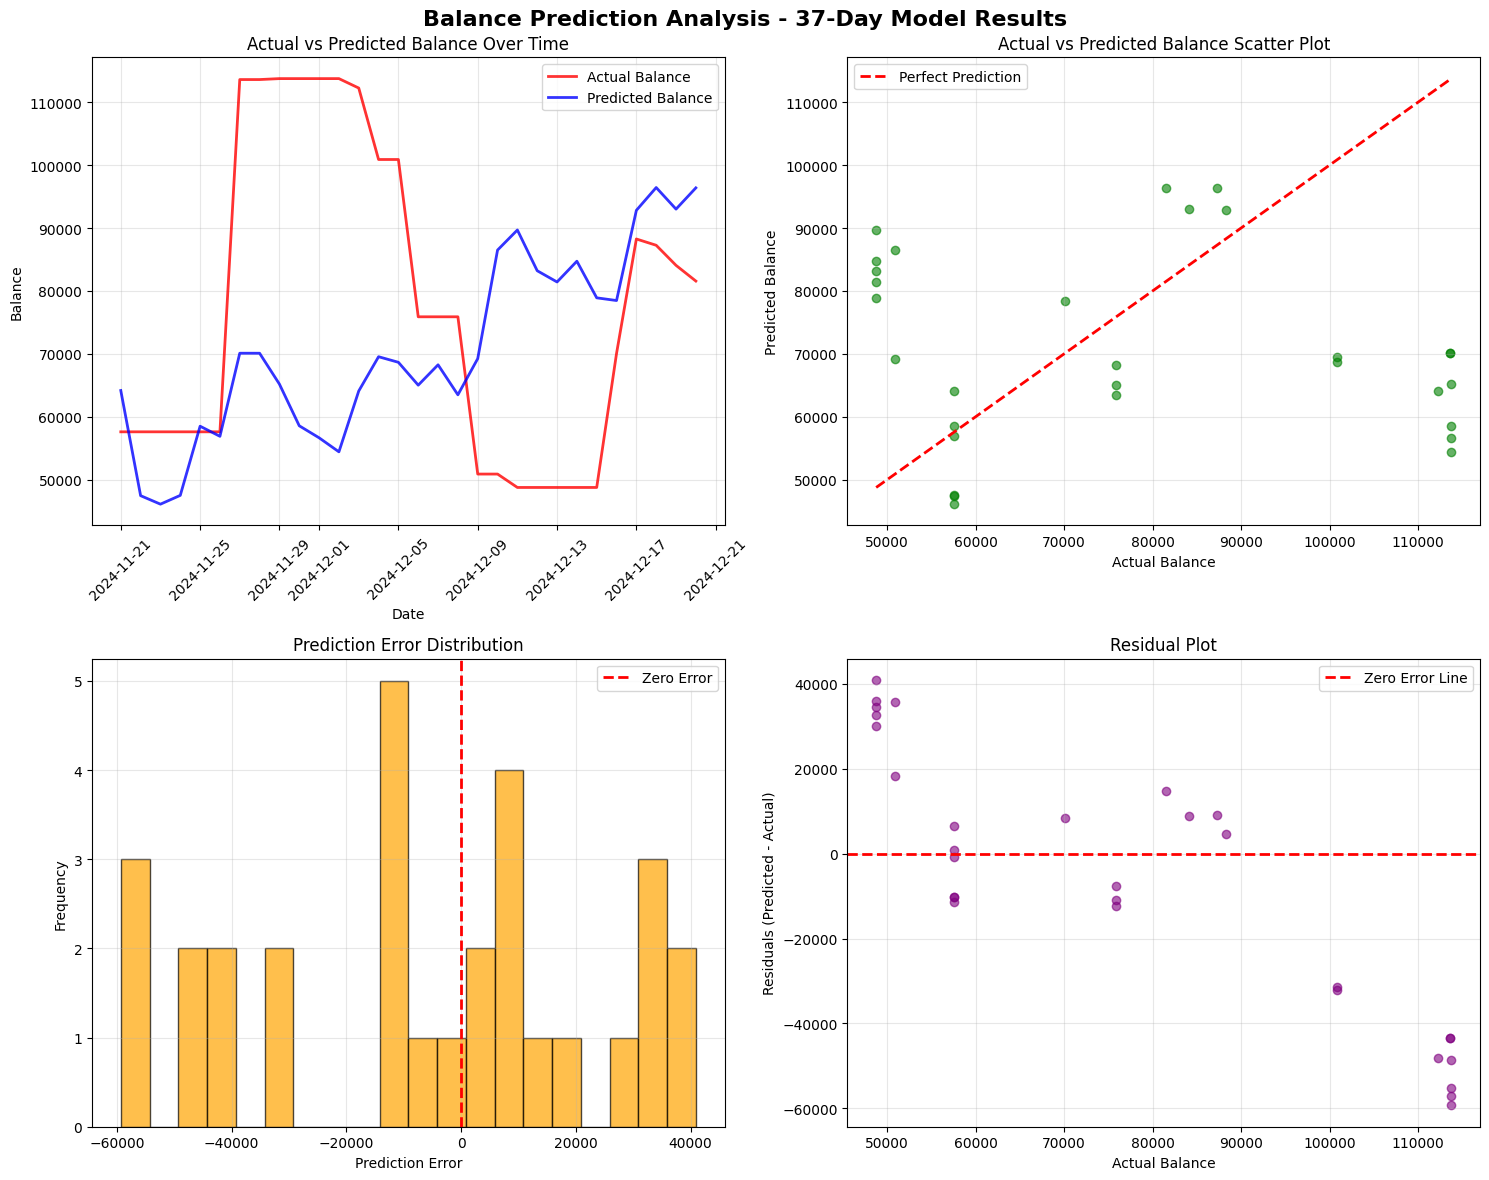


Comprehensive report saved to 'comprehensive_analysis_report.txt'

ANALYSIS COMPLETE!
Total datasets analyzed: 3
Files generated:
- balance_analysis_current_model_(first_29_days).png
- balance_analysis_current_model_(all_30_days).png
- balance_analysis_37-day_model_results.png
- comprehensive_analysis_report.txt


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')

def calculate_smape(actual, predicted):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

def calculate_metrics(actual, predicted):
    """
    Calculate various error metrics
    """
    # Remove any NaN values
    mask = ~(np.isnan(actual) | np.isnan(predicted))
    actual_clean = actual[mask]
    predicted_clean = predicted[mask]
    
    if len(actual_clean) == 0:
        return None
    
    # Mean Square Error
    mse = np.mean((actual_clean - predicted_clean) ** 2)
    
    # Root Mean Square Error
    rmse = np.sqrt(mse)
    
    # Mean Absolute Error
    mae = np.mean(np.abs(actual_clean - predicted_clean))
    
    # Mean Absolute Percentage Error
    mape = 100 * np.mean(np.abs((actual_clean - predicted_clean) / actual_clean))
    
    # SMAPE
    smape = calculate_smape(actual_clean, predicted_clean)
    
    # Correlation
    correlation = np.corrcoef(actual_clean, predicted_clean)[0, 1]
    
    # R-squared
    ss_res = np.sum((actual_clean - predicted_clean) ** 2)
    ss_tot = np.sum((actual_clean - actual_clean.mean()) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    
    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'smape': smape,
        'correlation': correlation,
        'r_squared': r_squared,
        'n_points': len(actual_clean)
    }

def create_visualizations(df, date_col, actual_col, predicted_col, title_suffix="", save_suffix=""):
    """
    Create comprehensive visualizations
    """
    # Set style
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Balance Prediction Analysis{title_suffix}', fontsize=16, fontweight='bold')
    
    # 1. Time Series Plot
    ax1 = axes[0, 0]
    ax1.plot(df[date_col], df[actual_col], 'r-', linewidth=2, label='Actual Balance', alpha=0.8)
    ax1.plot(df[date_col], df[predicted_col], 'b-', linewidth=2, label='Predicted Balance', alpha=0.8)
    ax1.set_title('Actual vs Predicted Balance Over Time')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Balance')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Rotate x-axis labels for better readability
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    # 2. Scatter Plot
    ax2 = axes[0, 1]
    ax2.scatter(df[actual_col], df[predicted_col], alpha=0.6, color='green')
    ax2.plot([df[actual_col].min(), df[actual_col].max()], 
             [df[actual_col].min(), df[actual_col].max()], 'r--', linewidth=2, label='Perfect Prediction')
    ax2.set_title('Actual vs Predicted Balance Scatter Plot')
    ax2.set_xlabel('Actual Balance')
    ax2.set_ylabel('Predicted Balance')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Error Distribution
    ax3 = axes[1, 0]
    errors = df[predicted_col] - df[actual_col]
    ax3.hist(errors, bins=20, alpha=0.7, color='orange', edgecolor='black')
    ax3.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
    ax3.set_title('Prediction Error Distribution')
    ax3.set_xlabel('Prediction Error')
    ax3.set_ylabel('Frequency')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Residual Plot
    ax4 = axes[1, 1]
    ax4.scatter(df[actual_col], errors, alpha=0.6, color='purple')
    ax4.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')
    ax4.set_title('Residual Plot')
    ax4.set_xlabel('Actual Balance')
    ax4.set_ylabel('Residuals (Predicted - Actual)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    filename = f'balance_analysis{save_suffix}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    return filename

def print_metrics_summary(metrics, title):
    """
    Print formatted metrics summary
    """
    print(f"\n{'='*50}")
    print(f"{title}")
    print(f"{'='*50}")
    
    if metrics is None:
        print("Error: Could not calculate metrics due to missing data")
        return
    
    print(f"Number of data points: {metrics['n_points']}")
    print(f"\nERROR METRICS:")
    print(f"Mean Square Error (MSE): {metrics['mse']:,.4f}")
    print(f"Root Mean Square Error (RMSE): {metrics['rmse']:,.4f}")
    print(f"Mean Absolute Error (MAE): {metrics['mae']:,.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {metrics['mape']:.2f}%")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {metrics['smape']:.2f}%")
    print(f"\nCORRELATION METRICS:")
    print(f"Correlation coefficient: {metrics['correlation']:.4f}")
    print(f"R-squared: {metrics['r_squared']:.4f}")
    
    # Interpretation
    print(f"\nINTERPRETATION:")
    if metrics['smape'] < 10:
        print("- SMAPE indicates excellent prediction accuracy")
    elif metrics['smape'] < 20:
        print("- SMAPE indicates good prediction accuracy")
    elif metrics['smape'] < 30:
        print("- SMAPE indicates moderate prediction accuracy")
    else:
        print("- SMAPE indicates poor prediction accuracy")
    
    if abs(metrics['correlation']) > 0.8:
        print("- Strong correlation between actual and predicted values")
    elif abs(metrics['correlation']) > 0.5:
        print("- Moderate correlation between actual and predicted values")
    else:
        print("- Weak correlation between actual and predicted values")
    
    return metrics

def analyze_dataset(file_path, dataset_name, date_col_name=None, actual_col_name=None, predicted_col_name=None, limit_days=None):
    """
    Analyze a single dataset
    """
    try:
        print(f"\n{'='*60}")
        print(f"ANALYZING {dataset_name.upper()}")
        print(f"{'='*60}")
        
        # Read the Excel file
        print(f"Reading {file_path}...")
        df = pd.read_excel(file_path)
        
        print(f"Data shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        print("\nFirst few rows:")
        print(df.head())
        
        # Try to identify the correct column names
        if date_col_name is None:
            date_candidates = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
            date_col = date_candidates[0] if date_candidates else df.columns[0]
        else:
            date_col = date_col_name
            
        if actual_col_name is None:
            balance_candidates = [col for col in df.columns if 'balance' in col.lower() or 'amount' in col.lower()]
            # Look for actual vs predicted patterns
            actual_candidates = [col for col in balance_candidates if 'actual' in col.lower() or col == 'Balance']
            actual_col = actual_candidates[0] if actual_candidates else df.columns[1]
        else:
            actual_col = actual_col_name
            
        if predicted_col_name is None:
            predicted_candidates = [col for col in df.columns if 'predict' in col.lower() or 'forecast' in col.lower()]
            predicted_col = predicted_candidates[0] if predicted_candidates else df.columns[2]
        else:
            predicted_col = predicted_col_name
        
        print(f"\nUsing columns:")
        print(f"Date: {date_col}")
        print(f"Actual: {actual_col}")
        print(f"Predicted: {predicted_col}")
        
        # Convert date column to datetime if it's not already
        if not pd.api.types.is_datetime64_any_dtype(df[date_col]):
            try:
                df[date_col] = pd.to_datetime(df[date_col])
            except:
                print(f"Warning: Could not convert {date_col} to datetime")
        
        # Sort by date
        df = df.sort_values(date_col).reset_index(drop=True)
        
        # Limit to first N days if specified
        if limit_days is not None:
            df = df.head(limit_days)
            print(f"\nLimited to first {limit_days} days")
            print(f"New data shape: {df.shape}")
        
        # Calculate metrics
        print("\nCalculating error metrics...")
        metrics = calculate_metrics(df[actual_col], df[predicted_col])
        
        # Print metrics summary
        metrics = print_metrics_summary(metrics, f"{dataset_name} - ERROR METRICS")
        
        # Create visualizations
        print(f"\nCreating visualizations for {dataset_name}...")
        save_suffix = f"_{dataset_name.lower().replace(' ', '_')}"
        title_suffix = f" - {dataset_name}"
        filename = create_visualizations(df, date_col, actual_col, predicted_col, title_suffix, save_suffix)
        
        # Return results for comparison
        return {
            'dataset_name': dataset_name,
            'metrics': metrics,
            'dataframe': df,
            'columns': {'date': date_col, 'actual': actual_col, 'predicted': predicted_col},
            'visualization_file': filename
        }
        
    except FileNotFoundError:
        print(f"Error: Excel file '{file_path}' not found")
        return None
    except Exception as e:
        print(f"Error analyzing {dataset_name}: {str(e)}")
        return None

def save_comprehensive_report(results_list):
    """
    Save comprehensive analysis report
    """
    with open('comprehensive_analysis_report.txt', 'w') as f:
        f.write("COMPREHENSIVE BALANCE PREDICTION ANALYSIS REPORT\n")
        f.write("=" * 60 + "\n\n")
        f.write(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
        
        # Summary table
        f.write("SUMMARY TABLE:\n")
        f.write("-" * 80 + "\n")
        f.write(f"{'Dataset':<20} {'Points':<8} {'MSE':<15} {'RMSE':<15} {'MAPE':<10} {'SMAPE':<10} {'R²':<8}\n")
        f.write("-" * 80 + "\n")
        
        for result in results_list:
            if result and result['metrics']:
                m = result['metrics']
                f.write(f"{result['dataset_name']:<20} {m['n_points']:<8} "
                       f"{m['mse']:<15.2f} {m['rmse']:<15.2f} {m['mape']:<10.2f}% "
                       f"{m['smape']:<10.2f}% {m['r_squared']:<8.4f}\n")
        f.write("-" * 80 + "\n\n")
        
        # Detailed analysis for each dataset
        for result in results_list:
            if result and result['metrics']:
                f.write(f"\nDETAILED ANALYSIS - {result['dataset_name'].upper()}\n")
                f.write("=" * 50 + "\n")
                
                df = result['dataframe']
                m = result['metrics']
                cols = result['columns']
                
                f.write(f"Dataset Information:\n")
                f.write(f"- Total records: {len(df)}\n")
                f.write(f"- Date range: {df[cols['date']].min()} to {df[cols['date']].max()}\n")
                f.write(f"- Actual balance range: {df[cols['actual']].min():.2f} to {df[cols['actual']].max():.2f}\n")
                f.write(f"- Predicted balance range: {df[cols['predicted']].min():.2f} to {df[cols['predicted']].max():.2f}\n\n")
                
                f.write("Error Metrics:\n")
                f.write(f"- Mean Square Error (MSE): {m['mse']:,.4f}\n")
                f.write(f"- Root Mean Square Error (RMSE): {m['rmse']:,.4f}\n")
                f.write(f"- Mean Absolute Error (MAE): {m['mae']:,.4f}\n")
                f.write(f"- Mean Absolute Percentage Error (MAPE): {m['mape']:.2f}%\n")
                f.write(f"- Symmetric Mean Absolute Percentage Error (SMAPE): {m['smape']:.2f}%\n")
                f.write(f"- Correlation coefficient: {m['correlation']:.4f}\n")
                f.write(f"- R-squared: {m['r_squared']:.4f}\n\n")
                
                # Performance assessment
                f.write("Performance Assessment:\n")
                if m['smape'] < 10:
                    f.write("- Excellent prediction accuracy (SMAPE < 10%)\n")
                elif m['smape'] < 20:
                    f.write("- Good prediction accuracy (SMAPE < 20%)\n")
                elif m['smape'] < 30:
                    f.write("- Moderate prediction accuracy (SMAPE < 30%)\n")
                else:
                    f.write("- Poor prediction accuracy (SMAPE > 30%)\n")
                
                if abs(m['correlation']) > 0.8:
                    f.write("- Strong correlation between actual and predicted\n")
                elif abs(m['correlation']) > 0.5:
                    f.write("- Moderate correlation between actual and predicted\n")
                else:
                    f.write("- Weak correlation between actual and predicted\n")
                
                f.write(f"- Visualization saved as: {result['visualization_file']}\n")
        
        f.write(f"\n\nRECOMMENDATIONS:\n")
        f.write("-" * 20 + "\n")
        f.write("1. Compare MSE and RMSE values to identify which model performs better\n")
        f.write("2. Lower SMAPE values indicate better prediction accuracy\n")
        f.write("3. Higher correlation and R-squared values suggest better model fit\n")
        f.write("4. Review visualizations for patterns in prediction errors\n")
        f.write("5. Consider model improvements if SMAPE > 20% or R-squared < 0.5\n")
    
    print(f"\nComprehensive report saved to 'comprehensive_analysis_report.txt'")

def main():
    """
    Main function to perform comprehensive analysis
    """
    print("COMPREHENSIVE BALANCE PREDICTION ANALYSIS")
    print("=" * 50)
    
    results = []
    
    # Analyze current 30-day dataset (first 29 days only)
    current_result = analyze_dataset(
        'date_over_balance_test.xlsx',
        'Current Model (First 29 Days)',
        limit_days=29
    )
    if current_result:
        results.append(current_result)
    
    # Analyze current 30-day dataset (all days)
    current_full_result = analyze_dataset(
        'date_over_balance_test.xlsx',
        'Current Model (All 30 Days)'
    )
    if current_full_result:
        results.append(current_full_result)
    
    # Analyze 37-day dataset if available
    if os.path.exists('37_days/forecast_final_with_actual.xlsx'):
        day37_result = analyze_dataset(
            '37_days/forecast_final_with_actual.xlsx',
            '37-Day Model Results',
            date_col_name='Time',
            actual_col_name='Unnamed: 6',
            predicted_col_name='Denormalized_Actual'
        )
        if day37_result:
            results.append(day37_result)
    
    # Generate comprehensive report
    if results:
        save_comprehensive_report(results)
        
        print(f"\n{'='*60}")
        print("ANALYSIS COMPLETE!")
        print(f"{'='*60}")
        print(f"Total datasets analyzed: {len(results)}")
        print("Files generated:")
        for result in results:
            if result:
                print(f"- {result['visualization_file']}")
        print("- comprehensive_analysis_report.txt")
    else:
        print("No datasets could be analyzed. Please check file paths and formats.")

if __name__ == "__main__":
    main() 

In [ ]:
# Run the comprehensive analysis
main()
